In [162]:
# importing some important libraries
import os

# scipy imports
# There are several universal functions for numpy arrays that are available through the scipy package
import scipy as sc
from scipy import stats, integrate
from scipy.stats.mstats import mode

# numpy imports
# pandas depends on numpy
import numpy as np
np.set_printoptions(precision=4, threshold=500, suppress=True)

# to make this notebook's output stable across runs
np.random.seed(12345)
np.random.seed(sum(map(ord, "distributions")))

# pandas imports
# The convention is to import pandas package with a pd prefix. 
# Also, since we most commonly use Series and DataFrame classes from this package, 
# we import them into the current namespace, so we do not have to refer to them with the pd prefix.
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None) # enables showing all columns
pd.options.display.max_rows = 100
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.notebook_repr_html = True
np.set_printoptions(precision=4, suppress=True)

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
# To plot pretty figures
#plt.rc('figure', figsize=(10, 6))
#plt.subplots(figsize=(10,6))
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

# bokeh imports
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [163]:
# reading data to a dataframe
data=pd.read_csv('WeatherAUS.csv')

In [164]:
# shape of data
data.shape

(145460, 23)

In [143]:
 data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [167]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [168]:
No_percent=(110316/(110316+31877))*100
Yes_percent=(31877/(110316+31877))*100

In [147]:
(df.isnull().sum()/len(df))*100

date              0.000000
mintemp           0.000000
maxtemp           0.000000
rainfall          0.000000
evaporation       0.006667
                    ...   
winddir3pm_SSW    0.000000
winddir3pm_SW     0.000000
winddir3pm_W      0.000000
winddir3pm_WNW    0.000000
winddir3pm_WSW    0.000000
Length: 110, dtype: float64

In [169]:
Yes_percent

22.418121848473554

In [170]:
No_percent

77.58187815152645

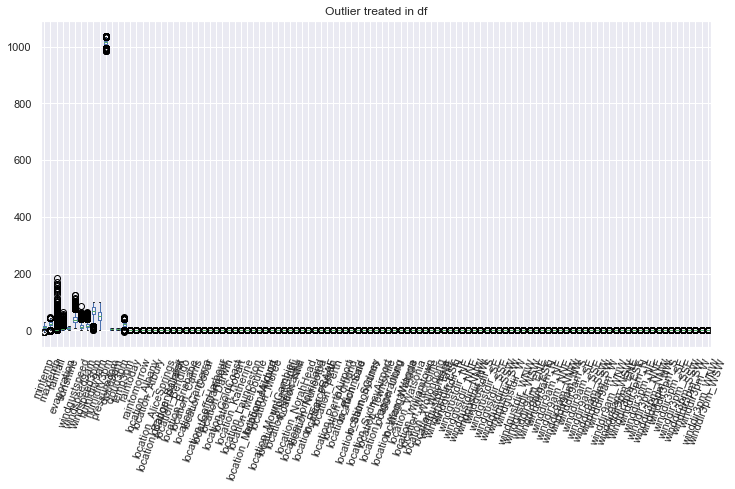

In [150]:
#checking outliers
df.plot(kind='box',figsize=(12,6))
plt.xticks(rotation=70);
plt.title('Outlier treated in df');


In [172]:
# because dataset is very large, we randomly select 1000 of the observation

df=data.sample(n=15000,random_state=123)

In [173]:
df.shape 

(15000, 23)

In [174]:
df.head

<bound method NDFrame.head of               Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
63744   2016-04-05           Sale      7.6     28.1       0.0          NaN   
51195   2015-02-10    Tuggeranong     17.0     28.9       0.0          NaN   
34574   2011-12-21  SydneyAirport     18.6     22.7       0.0          6.8   
143705  2016-12-31      Katherine     23.0     31.5      13.0          3.2   
90935   2010-10-27      GoldCoast     18.7     26.1       0.0          NaN   
...            ...            ...      ...      ...       ...          ...   
97134   2010-09-23       Adelaide      8.2     16.6       0.0          2.8   
43580   2011-10-30     Wollongong     17.0     21.2       0.0          NaN   
113374  2014-01-27    Witchcliffe     12.0     24.3       0.0          NaN   
67911   2010-06-12      Melbourne      8.0     13.2       2.8          2.8   
52091   2008-12-30    MountGinini      5.0     10.0       0.0          NaN   

        Sunshine WindGustDir  Win

In [175]:
# resetting the index of dataset
df.reset_index(drop=True,inplace=True)

In [176]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15000 non-null  object 
 1   Location       15000 non-null  object 
 2   MinTemp        14857 non-null  float64
 3   MaxTemp        14877 non-null  float64
 4   Rainfall       14688 non-null  float64
 5   Evaporation    8539 non-null   float64
 6   Sunshine       7787 non-null   float64
 7   WindGustDir    13950 non-null  object 
 8   WindGustSpeed  13954 non-null  float64
 9   WindDir9am     13868 non-null  object 
 10  WindDir3pm     14579 non-null  object 
 11  WindSpeed9am   14835 non-null  float64
 12  WindSpeed3pm   14701 non-null  float64
 13  Humidity9am    14736 non-null  float64
 14  Humidity3pm    14561 non-null  float64
 15  Pressure9am    13459 non-null  float64
 16  Pressure3pm    13458 non-null  float64
 17  Cloud9am       9207 non-null   float64
 18  Cloud3

In [177]:
#checking null values of dataset
df.isnull().sum()

Date                0
Location            0
MinTemp           143
MaxTemp           123
Rainfall          312
Evaporation      6461
Sunshine         7213
WindGustDir      1050
WindGustSpeed    1046
WindDir9am       1132
WindDir3pm        421
WindSpeed9am      165
WindSpeed3pm      299
Humidity9am       264
Humidity3pm       439
Pressure9am      1541
Pressure3pm      1542
Cloud9am         5793
Cloud3pm         6154
Temp9am           169
Temp3pm           350
RainToday         312
RainTomorrow      332
dtype: int64

In [178]:

#filling the missing values with 'backfill' method
df.fillna(method='backfill',inplace=True)

In [179]:
#filling the missing values with 'backfill' method
df.fillna(method='backfill',inplace=True)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15000 non-null  object 
 1   Location       15000 non-null  object 
 2   MinTemp        15000 non-null  float64
 3   MaxTemp        15000 non-null  float64
 4   Rainfall       15000 non-null  float64
 5   Evaporation    14999 non-null  float64
 6   Sunshine       14999 non-null  float64
 7   WindGustDir    14999 non-null  object 
 8   WindGustSpeed  14999 non-null  float64
 9   WindDir9am     15000 non-null  object 
 10  WindDir3pm     15000 non-null  object 
 11  WindSpeed9am   15000 non-null  float64
 12  WindSpeed3pm   15000 non-null  float64
 13  Humidity9am    15000 non-null  float64
 14  Humidity3pm    15000 non-null  float64
 15  Pressure9am    14999 non-null  float64
 16  Pressure3pm    14999 non-null  float64
 17  Cloud9am       14999 non-null  float64
 18  Cloud3

In [181]:

#converting 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date'],format='%Y/%m/%d')

In [182]:

df.Date.dtypes

dtype('<M8[ns]')

In [183]:
#convert all the letters to lower case
df.columns=df.columns.str.lower()

In [184]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [67]:
df.location.unique()

array(['Sale', 'Tuggeranong', 'SydneyAirport', 'Katherine', 'GoldCoast',
       'Witchcliffe', 'Cobar', 'Woomera', 'Richmond', 'Albany',
       'Canberra', 'Mildura', 'Adelaide', 'Darwin', 'Dartmoor',
       'AliceSprings', 'Walpole', 'Wollongong', 'Watsonia', 'Williamtown',
       'Townsville', 'CoffsHarbour', 'Moree', 'Brisbane', 'WaggaWagga',
       'Newcastle', 'NorfolkIsland', 'NorahHead', 'Hobart',
       'MountGambier', 'Nuriootpa', 'Perth', 'SalmonGums', 'Bendigo',
       'Sydney', 'Albury', 'PerthAirport', 'MelbourneAirport', 'Cairns',
       'Melbourne', 'Portland', 'Penrith', 'Ballarat', 'Nhil',
       'Launceston', 'BadgerysCreek', 'MountGinini', 'PearceRAAF',
       'Uluru'], dtype=object)

In [185]:
# We drop the location , risk_mm and "date" column because location is not important, and risk_mm is created to make target value
# so it can impact our prediction models. We also dont need "date" because we dont want to do Time Series analysis
df.drop(columns=['location','risk_mm','date'],axis=1,inplace=True)

KeyError: "['risk_mm'] not found in axis"

In [69]:
#check the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15000 non-null  datetime64[ns]
 1   location       15000 non-null  object        
 2   mintemp        15000 non-null  float64       
 3   maxtemp        15000 non-null  float64       
 4   rainfall       15000 non-null  float64       
 5   evaporation    14999 non-null  float64       
 6   sunshine       14999 non-null  float64       
 7   windgustdir    14999 non-null  object        
 8   windgustspeed  14999 non-null  float64       
 9   winddir9am     15000 non-null  object        
 10  winddir3pm     15000 non-null  object        
 11  windspeed9am   15000 non-null  float64       
 12  windspeed3pm   15000 non-null  float64       
 13  humidity9am    15000 non-null  float64       
 14  humidity3pm    15000 non-null  float64       
 15  pressure9am    1499

In [70]:
# converting Yes or No values
df.raintomorrow.replace({'No':0, 'Yes':1}, inplace=True)
df.raintoday.replace({'No':0, 'Yes':1}, inplace=True)

In [71]:
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
count,15000.000000,15000.000000,15000.000000,14999.000000,14999.000000,14999.000000,15000.000000,15000.00000,15000.000000,15000.00000,14999.000000,14999.000000,14999.000000,14999.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,12.167873,23.208967,2.293760,5.366418,7.672512,39.906727,13.861467,18.57040,68.993000,51.55600,1017.740276,1015.338923,4.454164,4.512101,16.981293,21.681767,0.219467,0.224600
std,6.379226,7.110875,8.364679,4.055592,3.797171,13.569723,8.930890,8.74825,19.079815,20.78966,7.112224,6.995291,2.874749,2.720029,6.481026,6.917947,0.413899,0.417333
min,-7.000000,-2.700000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,1.000000,1.00000,985.900000,984.500000,0.000000,0.000000,-6.200000,-3.700000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.00000,57.000000,37.00000,1013.100000,1010.600000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.600000,8.600000,37.000000,13.000000,17.00000,70.000000,52.00000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,7.300000,10.700000,48.000000,19.000000,24.00000,83.000000,66.00000,1022.500000,1020.100000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000
max,30.300000,47.300000,183.400000,65.800000,14.300000,126.000000,87.000000,65.00000,100.000000,100.00000,1040.400000,1037.800000,8.000000,8.000000,39.100000,45.800000,1.000000,1.000000


In [72]:
#making corrolation matrix 
a=df.corr()

<AxesSubplot:>

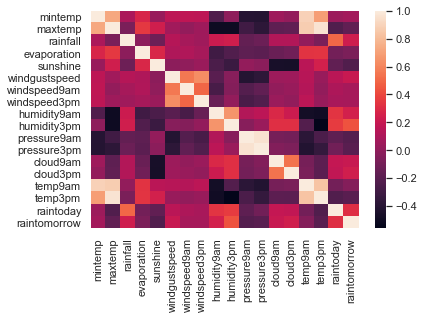

In [73]:
sns.heatmap(a, 
            xticklabels=a.columns.values,
            yticklabels=a.columns.values)

In [74]:
#specifying high corrolation
b=a.where(a>0.8)

In [75]:
# (mintemp,temp9am),(maxtemp,temp9am,temp3pm),(pressure9am,pressure3pm,),(temp9am,mintemp,maxtemp,temp3pm)
#(temp3pm,temp9am)
# these columns are highly corrolated so we drop them

In [76]:
print(b)

                mintemp   maxtemp  rainfall  evaporation  sunshine  \
mintemp        1.000000       NaN       NaN          NaN       NaN   
maxtemp             NaN  1.000000       NaN          NaN       NaN   
rainfall            NaN       NaN       1.0          NaN       NaN   
evaporation         NaN       NaN       NaN          1.0       NaN   
sunshine            NaN       NaN       NaN          NaN       1.0   
windgustspeed       NaN       NaN       NaN          NaN       NaN   
windspeed9am        NaN       NaN       NaN          NaN       NaN   
windspeed3pm        NaN       NaN       NaN          NaN       NaN   
humidity9am         NaN       NaN       NaN          NaN       NaN   
humidity3pm         NaN       NaN       NaN          NaN       NaN   
pressure9am         NaN       NaN       NaN          NaN       NaN   
pressure3pm         NaN       NaN       NaN          NaN       NaN   
cloud9am            NaN       NaN       NaN          NaN       NaN   
cloud3pm            

In [79]:
# temp9am,pressure9am are highly corrolated so we drop them

In [80]:
df.drop(columns=['temp9am','pressure9am'],inplace=True)

KeyError: "['temp9am' 'pressure9am'] not found in axis"

In [81]:
#selection only numerical variables, except target variablze
df_target=df[['raintomorrow']]
df_numeric=df[['mintemp','maxtemp','rainfall','evaporation','sunshine','windgustspeed',
              'windspeed9am','windspeed3pm','humidity9am','humidity3pm','pressure3pm',
              'cloud9am','cloud3pm','temp3pm','raintoday']]

In [82]:
# selection categorical variables
df_cat=df[['windgustdir','winddir9am','winddir3pm']]

In [83]:
# data frame before creating dummies:
df_not_dummies=pd.concat([df_numeric,df_cat],axis=1)
df_not_dummies.shape

(15000, 18)

In [84]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday,raintomorrow
0,2016-04-05,Sale,7.6,28.1,0.0,6.8,5.5,E,33.0,WNW,E,7.0,9.0,98.0,38.0,1009.1,7.0,6.0,27.5,0,0
1,2015-02-10,Tuggeranong,17.0,28.9,0.0,6.8,5.5,E,33.0,SW,NNW,0.0,11.0,75.0,46.0,1020.5,7.0,6.0,27.7,0,0
2,2011-12-21,SydneyAirport,18.6,22.7,0.0,6.8,5.5,SSW,37.0,SW,S,9.0,26.0,71.0,75.0,1017.0,7.0,6.0,21.2,0,0
3,2016-12-31,Katherine,23.0,31.5,13.0,3.2,6.4,W,57.0,NW,WNW,24.0,28.0,93.0,69.0,999.6,8.0,7.0,23.5,1,1
4,2010-10-27,GoldCoast,18.7,26.1,0.0,4.1,6.4,E,26.0,E,E,13.0,19.0,73.0,69.0,1014.0,7.0,7.0,23.5,0,0


In [85]:
#making dummy variables for categorical variables
df=pd.get_dummies(df,drop_first=True)

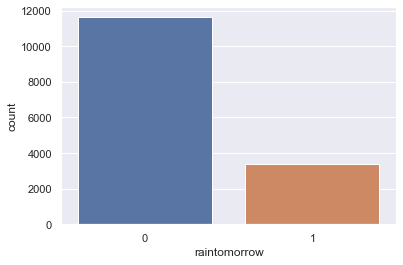

In [86]:
# visualizing rain vs no rain
sns.set(style="darkgrid")
ax = sns.countplot(x="raintomorrow", data=df)

array([[<AxesSubplot:title={'center':'mintemp'}>,
        <AxesSubplot:title={'center':'maxtemp'}>,
        <AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'evaporation'}>],
       [<AxesSubplot:title={'center':'sunshine'}>,
        <AxesSubplot:title={'center':'windgustspeed'}>,
        <AxesSubplot:title={'center':'windspeed9am'}>,
        <AxesSubplot:title={'center':'windspeed3pm'}>],
       [<AxesSubplot:title={'center':'humidity9am'}>,
        <AxesSubplot:title={'center':'humidity3pm'}>,
        <AxesSubplot:title={'center':'pressure3pm'}>,
        <AxesSubplot:title={'center':'cloud9am'}>],
       [<AxesSubplot:title={'center':'cloud3pm'}>,
        <AxesSubplot:title={'center':'temp3pm'}>,
        <AxesSubplot:title={'center':'raintoday'}>, <AxesSubplot:>]],
      dtype=object)

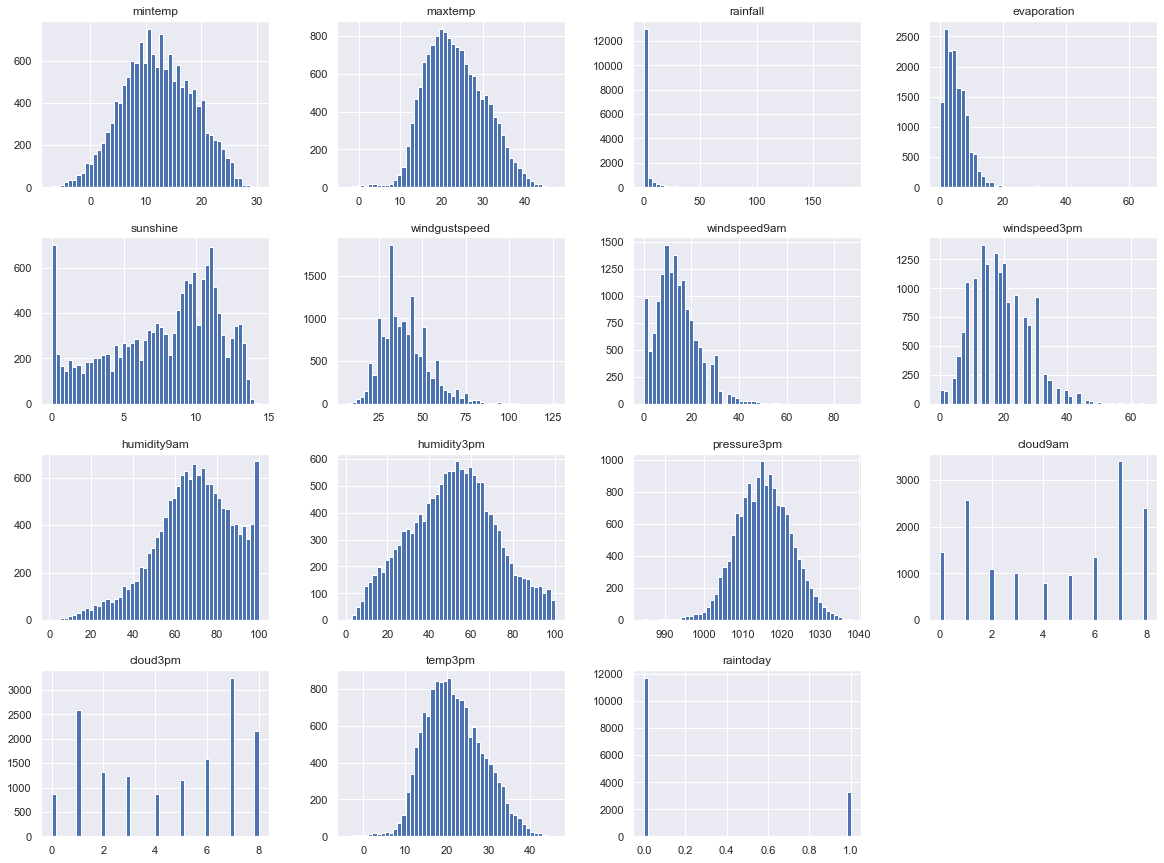

In [88]:
# creating histograms for variables
%matplotlib inline
import matplotlib.pyplot as plt
df_numeric.hist(bins=50, figsize=(20,15))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mintemp', ylabel='maxtemp'>

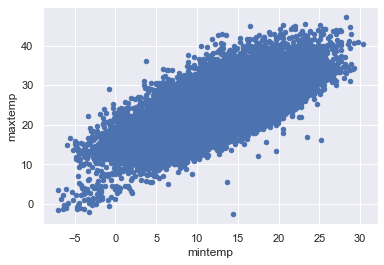

In [89]:
#scatter plot
df.plot(kind="scatter", x="mintemp", y="maxtemp")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='evaporation', ylabel='sunshine'>

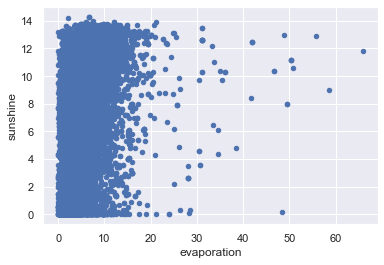

In [90]:
df.plot(kind="scatter", x="evaporation", y="sunshine")

In [91]:

#Now we have to scale our data:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [92]:
df.head()

,date,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,cloud9am,cloud3pm,temp3pm,raintoday,raintomorrow,location_Albany,location_Albury,location_AliceSprings,location_BadgerysCreek,location_Ballarat,location_Bendigo,location_Brisbane,location_Cairns,location_Canberra,location_Cobar,location_CoffsHarbour,location_Dartmoor,location_Darwin,location_GoldCoast,location_Hobart,location_Katherine,location_Launceston,location_Melbourne,location_MelbourneAirport,location_Mildura,location_Moree,location_MountGambier,location_MountGinini,location_Newcastle,location_Nhil,location_NorahHead,location_NorfolkIsland,location_Nuriootpa,location_PearceRAAF,location_Penrith,location_Perth,location_PerthAirport,location_Portland,location_Richmond,location_Sale,location_SalmonGums,location_Sydney,location_SydneyAirport,location_Townsville,location_Tuggeranong,location_Uluru,location_WaggaWagga,location_Walpole,location_Watsonia,location_Williamtown,location_Witchcliffe,location_Wollongong,location_Woomera,windgustdir_ENE,windgustdir_ESE,windgustdir_N,windgustdir_NE,windgustdir_NNE,windgustdir_NNW,windgustdir_NW,windgustdir_S,windgustdir_SE,windgustdir_SSE,windgustdir_SSW,windgustdir_SW,windgustdir_W,windgustdir_WNW,windgustdir_WSW,winddir9am_ENE,winddir9am_ESE,winddir9am_N,winddir9am_NE,winddir9am_NNE,winddir9am_NNW,winddir9am_NW,winddir9am_S,winddir9am_SE,winddir9am_SSE,winddir9am_SSW,winddir9am_SW,winddir9am_W,winddir9am_WNW,winddir9am_WSW,winddir3pm_ENE,winddir3pm_ESE,winddir3pm_N,winddir3pm_NE,winddir3pm_NNE,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW
0,2016-04-05,7.6,28.1,0.0,6.8,5.5,33.0,7.0,9.0,98.0,38.0,1009.1,7.0,6.0,27.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-02-10,17.0,28.9,0.0,6.8,5.5,33.0,0.0,11.0,75.0,46.0,1020.5,7.0,6.0,27.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2011-12-21,18.6,22.7,0.0,6.8,5.5,37.0,9.0,26.0,71.0,75.0,1017.0,7.0,6.0,21.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2016-12-31,23.0,31.5,13.0,3.2,6.4,57.0,24.0,28.0,93.0,69.0,999.6,8.0,7.0,23.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2010-10-27,18.7,26.1,0.0,4.1,6.4,26.0,13.0,19.0,73.0,69.0,1014.0,7.0,7.0,23.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
df.raintomorrow.unique()

array([0, 1], dtype=int64)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 110 entries, date to winddir3pm_WSW
dtypes: datetime64[ns](1), float64(14), int64(2), uint8(93)
memory usage: 3.3 MB


In [95]:
df.describe

<bound method NDFrame.describe of             date  mintemp  maxtemp  rainfall  evaporation  sunshine  \
0     2016-04-05      7.6     28.1       0.0          6.8       5.5   
1     2015-02-10     17.0     28.9       0.0          6.8       5.5   
2     2011-12-21     18.6     22.7       0.0          6.8       5.5   
3     2016-12-31     23.0     31.5      13.0          3.2       6.4   
4     2010-10-27     18.7     26.1       0.0          4.1       6.4   
...          ...      ...      ...       ...          ...       ...   
14995 2010-09-23      8.2     16.6       0.0          2.8       5.8   
14996 2011-10-30     17.0     21.2       0.0          2.8       2.8   
14997 2014-01-27     12.0     24.3       0.0          2.8       2.8   
14998 2010-06-12      8.0     13.2       2.8          2.8       2.8   
14999 2008-12-30      5.0     10.0       0.0          NaN       NaN   

       windgustspeed  windspeed9am  windspeed3pm  humidity9am  humidity3pm  \
0               33.0           7.0 

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [119]:
df.raintomorrow.value_counts()

0    11631
1     3369
Name: raintomorrow, dtype: int64

In [116]:
# seperating target variable and predictors
X=df[[i for i in list(df.columns) if i != 'raintomorrow']]
y=df[['raintomorrow']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [186]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


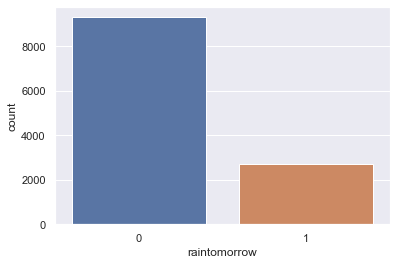

In [187]:
# checking the distribution of target value in train dataset
sns.set(style="darkgrid")
ax = sns.countplot(x="raintomorrow", data=y_train)

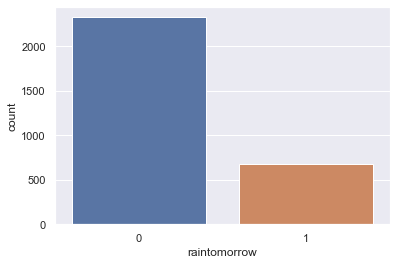

In [188]:
# checking the distribution of target value in test dataset
ax = sns.countplot(x="raintomorrow", data=y_test)

In [189]:
df.raintomorrow.value_counts()

No     11631
Yes     3369
Name: raintomorrow, dtype: int64

In [190]:
y_train.raintomorrow.value_counts()

0    9305
1    2695
Name: raintomorrow, dtype: int64

In [191]:
from sklearn.utils import resample

In [192]:
# Separate majority and minority classes
df_majority = y_train[y_train.raintomorrow==0]
df_minority = y_train[y_train.raintomorrow==1]

In [193]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6000,    # to match majority class
                                 random_state=42) # reproducible results

In [194]:
df_majority=df_majority.sample(n=6000,random_state=123)

In [195]:
y_train_balanced = pd.concat([df_majority, df_minority_upsampled])

In [196]:
y_train_balanced.reset_index()

,index,raintomorrow
0,10508,0
1,8076,0
2,13526,0
3,713,0
4,11978,0
...,...,...
11995,5631,1
11996,11879,1
11997,12349,1
11998,6603,1


In [197]:
# Display new class counts
y_train_balanced.raintomorrow.value_counts()

0    6000
1    6000
Name: raintomorrow, dtype: int64

In [199]:
# now we are going to apply a tunned logistic regression
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_log = {'C': c_space, 'penalty': ['l1', 'l2']}

In [200]:
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

In [203]:
# Instantiate the GridSearchCV object with 10 fold cv: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid_log, cv=12)


In [204]:
# Fit it to the training data
logreg_cv.fit(X_train, y_train)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [205]:
# Print the optimal parameters 
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameter: {'C': 1e-05, 'penalty': 'l1'}


In [206]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(accuracy_score(y_test,y_pred_log))

NameError: name 'y_pred_log' is not defined